In [16]:
#Resume Screening with NLP
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

[nltk_data] Downloading package stopwords to /home/smv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  42 non-null     object
 1   Resume    42 non-null     object
dtypes: object(2)
memory usage: 804.0+ bytes


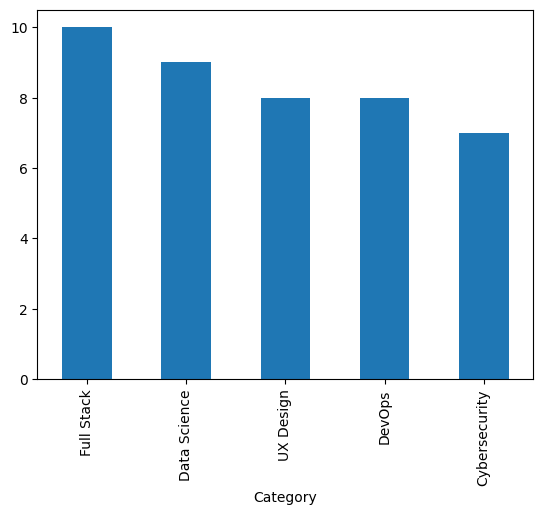

In [21]:
#load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()
df.info()

df['Category'].value_counts()
df['Category'].value_counts().plot(kind='bar')
plt.show()
#Data Preprocessing
#Cleaning the text
corpus = []
for i in range(0, len(df)):
    resume = re.sub('[^a-zA-Z]', ' ', df['Resume'][i])
    resume = resume.lower()
    resume = resume.split()
    ps = PorterStemmer()
    resume = [ps.stem(word) for word in resume if not word in set(stopwords.words('english'))]
    resume = ' '.join(resume)
    corpus.append(resume)
#Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Category']
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Training the Naive Bayes model on the Training set

In [25]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#Classification Report
report = classification_report(y_test, y_pred)
print(report)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 3]]
1.0
              precision    recall  f1-score   support

Data Science       1.00      1.00      1.00         1
      DevOps       1.00      1.00      1.00         2
  Full Stack       1.00      1.00      1.00         3
   UX Design       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

